In [1]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import scipy.sparse as sparse

In [2]:
#Input data file

train_df = pd.read_csv('train.csv',encoding='latin',parse_dates = True
                          , low_memory = False, index_col = 'OrderDate')
product_attributes = pd.read_csv('product_attributes.csv',encoding='latin', low_memory = False)

test_df = pd.read_csv('test_nFNPSyV.csv',encoding='latin')

In [3]:
#Basic Data Exploration

print("Dimensions:\n",train_df.shape)
print("---------------------------------------------------------------------")
print("Columns:\n",train_df.columns)
print("---------------------------------------------------------------------")
print("Top 3 rows:\n",train_df.head(3))
print("---------------------------------------------------------------------")
print("Info:\n")
print(train_df.info())
print("---------------------------------------------------------------------")
print("Unique value count:\n")
print(train_df.apply(lambda x: x.nunique()))
print("---------------------------------------------------------------------")
print("Missing value count:\n")
print(train_df.apply(lambda x: x.isna().sum()))
print("---------------------------------------------------------------------")
print("Max Quantity:",train_df.Quantity.max(),"Min Quantity:",train_df.Quantity.min())

Dimensions:
 (132551, 3)
---------------------------------------------------------------------
Columns:
 Index(['UserId', 'productid', 'Quantity'], dtype='object')
---------------------------------------------------------------------
Top 3 rows:
             UserId  productid  Quantity
OrderDate                              
2018-01-04   18075   12322648         1
2018-01-04    6820   12371370         1
2018-01-04    6820   12973004         1
---------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132551 entries, 2018-01-04 to 2018-10-30
Data columns (total 3 columns):
UserId       132551 non-null int64
productid    132551 non-null int64
Quantity     132551 non-null int64
dtypes: int64(3)
memory usage: 4.0 MB
None
---------------------------------------------------------------------
Unique value count:

UserId       27778
productid     3026
Quantity         9
dtype: int64
-----------------------------------------

In [4]:
#Basic Data Exploration

print("Dimensions:\n",product_attributes.shape)
print("---------------------------------------------------------------------")
print("Columns:\n",product_attributes.columns)
print("---------------------------------------------------------------------")
print("Top 3 rows:\n",product_attributes.head(3))
print("---------------------------------------------------------------------")
print("Info:\n")
print(product_attributes.info())
print("---------------------------------------------------------------------")
print("Unique value count:\n")
print(product_attributes.apply(lambda x: x.nunique()))
print("---------------------------------------------------------------------")
print("Missing value count:\n")
print(product_attributes.apply(lambda x: x.isna().sum()))
print("---------------------------------------------------------------------")
print("Unique attributes:\n")
print(product_attributes[['attribute_name']].drop_duplicates())
print("---------------------------------------------------------------------")
print("Unique attributes ids (top 10):\n")
print(product_attributes[['attributevalue']].drop_duplicates().head(10))

Dimensions:
 (18750, 3)
---------------------------------------------------------------------
Columns:
 Index(['productid', 'attribute_name', 'attributevalue'], dtype='object')
---------------------------------------------------------------------
Top 3 rows:
    productid attribute_name  attributevalue
0   11145600            Fit              37
1   11145600  Sleeve Length              23
2   11145600         Fabric              16
---------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18750 entries, 0 to 18749
Data columns (total 3 columns):
productid         18750 non-null int64
attribute_name    18750 non-null object
attributevalue    18750 non-null int64
dtypes: int64(2), object(1)
memory usage: 439.5+ KB
None
---------------------------------------------------------------------
Unique value count:

productid         3015
attribute_name       9
attributevalue     234
dtype: int64
-------------------------------

In [5]:
product_attributes_df = product_attributes.reset_index().pivot_table(index = 'productid'
                                                                     ,columns='attribute_name'
                                                                                           ,values='attributevalue'
                                                                     , aggfunc='min').fillna(0).apply(lambda x: x.astype('int64'))

In [6]:
print("Dimensions:\n",product_attributes_df.shape)
print("---------------------------------------------------------------------")
print("Columns:\n",product_attributes_df.columns)
print("---------------------------------------------------------------------")
print("Top 3 rows:\n",product_attributes_df.head(3))
print("---------------------------------------------------------------------")
print("Info:\n")
print(product_attributes_df.info())
print("---------------------------------------------------------------------")
print("Unique value count:\n")
print(product_attributes_df.apply(lambda x: x.nunique()))
print("---------------------------------------------------------------------")
print("Missing value count:\n")
print(product_attributes_df.apply(lambda x: x.isna().sum()))

Dimensions:
 (3015, 9)
---------------------------------------------------------------------
Columns:
 Index(['Category', 'Collection', 'Color', 'Fabric', 'Fit', 'Material',
       'Neckline', 'Season', 'Sleeve Length'],
      dtype='object', name='attribute_name')
---------------------------------------------------------------------
Top 3 rows:
 attribute_name  Category  Collection  Color  Fabric  Fit  Material  Neckline  \
productid                                                                      
11139192               1           0     41       2    0         0         0   
11139194               1           0     25       2    0         0         0   
11139524               1           0     95      16   14         0         4   

attribute_name  Season  Sleeve Length  
productid                              
11139192            42              0  
11139194            42              0  
11139524            42             23  
--------------------------------------------------

In [7]:
product_attributes_df.head(10)

attribute_name,Category,Collection,Color,Fabric,Fit,Material,Neckline,Season,Sleeve Length
productid,,,,,,,,,
11139192,1,0,41,2,0,0,0,42,0
11139194,1,0,25,2,0,0,0,42,0
11139524,1,0,95,16,14,0,4,42,23
11139560,1,0,41,2,14,0,4,42,127
11139588,1,0,25,58,0,0,0,42,0
11139650,1,0,31,2,14,0,4,42,23
11141306,1,0,28,2,0,0,0,56,0
11141308,1,0,71,2,0,0,0,56,0
11141318,1,0,149,2,0,0,0,56,0


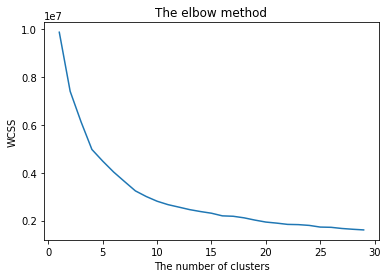

In [8]:
wcss = []
for i in range(1,30):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
 kmeans.fit(product_attributes_df)
 wcss.append(kmeans.inertia_)
 
plt.plot(range(1,30), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
product_clusters_km=KMeans(n_clusters=10, random_state=0).fit(product_attributes_df)

In [10]:
product_clusters_ac = AgglomerativeClustering(n_clusters=10).fit(product_attributes_df)

In [11]:
product_clus_df = product_attributes_df
product_clus_df['cluster_km'] = product_clusters_km.labels_.tolist()
product_clus_df['cluster_ac'] = product_clusters_ac.labels_.tolist()

In [12]:
product_clus_df.head(10)

attribute_name,Category,Collection,Color,Fabric,Fit,Material,Neckline,Season,Sleeve Length,cluster_km,cluster_ac
productid,,,,,,,,,,,
11139192,1,0,41,2,0,0,0,42,0,0,3
11139194,1,0,25,2,0,0,0,42,0,0,3
11139524,1,0,95,16,14,0,4,42,23,4,3
11139560,1,0,41,2,14,0,4,42,127,7,5
11139588,1,0,25,58,0,0,0,42,0,6,1
11139650,1,0,31,2,14,0,4,42,23,0,3
11141306,1,0,28,2,0,0,0,56,0,0,3
11141308,1,0,71,2,0,0,0,56,0,4,3
11141318,1,0,149,2,0,0,0,56,0,1,0


In [13]:
product_clus_df.groupby(['cluster_km']).size()

cluster_km
0    1283
1     149
2     217
3     304
4     342
5     186
6     266
7      89
8     115
9      64
dtype: int64

In [14]:
product_clus_df.groupby(['cluster_ac']).size()

cluster_ac
0     200
1     431
2     208
3    1012
4     407
5      91
6     294
7     104
8      56
9     212
dtype: int64

In [41]:
train_pivot_df = train_df.reset_index().pivot_table(index = 'UserId'
                                                                     ,columns='productid'
                                                                                           ,values='Quantity'
                                                                     , aggfunc='sum').fillna(0).apply(lambda x: x.astype('int64'))

In [42]:
#Basic Data Exploration

print("Dimensions:\n",train_pivot_df.shape)
print("---------------------------------------------------------------------")
print("Columns:\n",train_pivot_df.columns)
print("---------------------------------------------------------------------")
print("Top 3 rows:\n",train_pivot_df.head(3))
print("---------------------------------------------------------------------")
print("Info:\n")
print(train_pivot_df.info())
print("---------------------------------------------------------------------")

Dimensions:
 (27778, 3026)
---------------------------------------------------------------------
Columns:
 Int64Index([11139192, 11139194, 11139524, 11139560, 11139588, 11139650,
            11141306, 11141308, 11141318, 11141320,
            ...
            14122758, 14122762, 14122766, 14122818, 14122820, 14122822,
            14122832, 14122834, 14128359, 14129477],
           dtype='int64', name='productid', length=3026)
---------------------------------------------------------------------
Top 3 rows:
 productid  11139192  11139194  11139524  11139560  11139588  11139650  \
UserId                                                                  
0                 0         0         0         0         0         0   
1                 0         0         0         0         0         0   
2                 0         0         0         0         0         0   

productid  11141306  11141308  11141318  11141320    ...     14122758  \
UserId                                           

In [17]:
train_pivot_df.rename(columns=lambda x: "p_"+str(x), inplace=True)

In [20]:
train_pivot_df.head(10)

productid,p_11139192,p_11139194,p_11139524,p_11139560,p_11139588,p_11139650,p_11141306,p_11141308,p_11141318,p_11141320,...,p_14122758,p_14122762,p_14122766,p_14122818,p_14122820,p_14122822,p_14122832,p_14122834,p_14128359,p_14129477
UserId,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
train_mat = train_pivot_df.as_matrix()

In [43]:
from sklearn.metrics.pairwise import pairwise_distances 

In [ ]:
user_similarity = pairwise_distances(train_mat, metric='cosine')
item_similarity = pairwise_distances(train_mat.T, metric='cosine')